In [1]:
import numpy as np
import pandas as pd

pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', None)

In [2]:
data=pd.read_csv('LondonShooting.csvTweets.csv')

In [3]:
data.head()

,ID,datetime,has_media,is_reply,is_retweet,medias,nbr_favorite,nbr_reply,nbr_retweet,text,url,user_id,usernameTweet
0,1200419598169968641,2019-11-29 19:51:49,True,False,False,['https://t.co/i6BeIQVmGN'],3,0,2,London Bridge sealed off after reports of gunfire #London #Londonshooting ## londonbridge https://www. bbc.co.uk/news/uk-506047 81 …,/pcallaway/status/1200419598169968641,31836472,pcallaway
1,1200420290628595712,2019-11-29 19:54:34,NaN,False,False,NaN,0,0,0,Be careful #londonshooting,/Kar0l15/status/1200420290628595712,549688749,Kar0l15
2,1200422174751969285,2019-11-29 20:02:03,NaN,False,False,NaN,1,0,0,Unconfirmed reports of a shooting on london bridge.\nEmery must have taken his sacking pretty badly #Arsenal #LDN #Londonshooting,/weave8/status/1200422174751969285,246241580,weave8
3,1200422563832385538,2019-11-29 20:03:36,NaN,False,False,NaN,2,0,0,Video of the eyewitness of shooting #LondonBridge #London #Londonshooting https:// twitter.com/PrisonPlanet/s tatus/1200422249204977664 …,/fxtrader20161/status/1200422563832385538,1191486171496550400,fxtrader20161
4,1200424384864780291,2019-11-29 20:10:50,NaN,False,False,NaN,853,26,99,Just a friendly reminder that this is NOT the London Bridge. This is the TOWER BRIDGE. #LondonShooting pic.twitter.com/1mGSxfVUMn,/JMThompson95/status/1200424384864780291,298900702,JMThompson95


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5254 entries, 0 to 5253
Data columns (total 13 columns):
ID               5254 non-null int64
datetime         5254 non-null object
has_media        455 non-null object
is_reply         5254 non-null bool
is_retweet       5254 non-null bool
medias           455 non-null object
nbr_favorite     5254 non-null int64
nbr_reply        5254 non-null int64
nbr_retweet      5254 non-null int64
text             5254 non-null object
url              5254 non-null object
user_id          5254 non-null int64
usernameTweet    5254 non-null object
dtypes: bool(2), int64(5), object(6)
memory usage: 461.9+ KB


There are totally 5254 tweets in the data frame

For our analysis, the columns has_media, is_reply, is_retweet, medias, url, user_id and usernameTweet are not required

In [5]:
tweet=data.copy() # creating a copy of the original dataframe

In [6]:
tweet=tweet.drop(columns=['ID','has_media', 'is_reply', 'is_retweet', 'medias', 'url', 'user_id','usernameTweet'])

In [7]:
tweet.sample(5)

,datetime,nbr_favorite,nbr_reply,nbr_retweet,text
5173,2019-12-02 01:33:02,2,2,1,Guess who lies! #MSM Guess who controls and made up ISIS? #Jesuits and USA incorporated! Made up bs. Plus he didn't die. #FalseFlag world. It's a stage! The people are the audience. #LondonShooting hoax! https:// twitter.com/DailyMirror/st atus/1200816533758451717 …
3999,2019-11-30 07:48:35,0,0,0,We release convicted rapists on bail . England releases convicted terrorists on bail https:// trib.al/OllIHjz #RIPPriyankaReddy #LondonShooting #LondonBridge
3366,2019-11-30 04:23:08,0,0,0,Released on tag for terror offences. The government needs to be sued the fuck out of. #LondonShooting
1182,2019-11-29 22:36:16,0,3,0,If you want more incidents like #LondonShooting then #VoteConservative their cuts and foreign policies have created this. #LondonBridge #LondonBridgeAttack #ToryCutsKill #GE2019 \n #GetTheToriesOut
2237,2019-11-30 01:00:55,1,0,0,This is terrible. My thoughts go to the families of the victims. It is the second time a terrorist attack has occured right before a general election. #LondonShooting https:// twitter.com/BBCBreaking/st atus/1200479768807907330 …


In [8]:
tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5254 entries, 0 to 5253
Data columns (total 5 columns):
datetime        5254 non-null object
nbr_favorite    5254 non-null int64
nbr_reply       5254 non-null int64
nbr_retweet     5254 non-null int64
text            5254 non-null object
dtypes: int64(3), object(2)
memory usage: 205.3+ KB


In [9]:
import re
import string

Let us remove the urls and user mentions (@..)

In [10]:
tweet.sample(5)

,datetime,nbr_favorite,nbr_reply,nbr_retweet,text
2763,2019-11-30 02:28:11,3,0,0,"Would you have given him a big cuddle, stroked his hair, praised him and said “everything is going to be ok, Jeremy and Diane are coming to help us” #snowflake #LondonShooting #Terrorist #terrorattack #LondonBridge"
2364,2019-11-30 01:22:36,32,3,0,Was caught up in the London Bridge incident today and want to say thank you to all at the Bridge Tap in Borough High Street for being brilliant and looking after us all #LondonShooting
3346,2019-11-30 04:21:23,3,0,0,They need to stop letting psychos out of jail early ffs.\nClearly it's a tragedy what happened today but the negligence just gets me angry.\n#LondonShooting
3796,2019-11-30 06:00:13,6,0,6,"Once again the abject failure of the British response to the jihad terror threat is illustrated, but nothing will change. \n\nPoliticians will issue the usual vows to crush terrorism. \n\n#LondonBridge #LondonShooting \n#LondonBridgeAttack https:// wp.me/p4hgqZ-LzK"
4796,2019-11-30 17:33:56,0,0,0,# uk #brexit #LondonBridge #LondonBridgeAttack #londonterrorattack #LondonShooting PAYPAL BLOCK 'FOR BRITAIN' PARTY SUBSCRIPTIONS- THEY MUST BE WORRIED ABOUT THE TRUTH Don't let Silicon Valley determine our future https:// youtu.be/_GjqIuAzuig


### Cleaning

Defining a function to remove unwanted characters

In [11]:
def clean_text(text):
    text=text.replace('\n','') # remove '\n' characters
    text=re.sub(r'https?:\/\/.*[\r\n]*', '', text) # remove urls
    text=re.sub("@\s*\S+","",text) # remove user mentions
    text_cleaned=re.sub("pic.\S+","",text) # remove other links
    
    return text_cleaned

In [12]:
tweet['cleaned_tweet']=tweet['text'].apply(lambda x:clean_text(x))

In [13]:
tweet.sample(5)

,datetime,nbr_favorite,nbr_reply,nbr_retweet,text,cleaned_tweet
236,2019-11-29 21:27:04,0,0,0,# LondonShooting thank you to everyone in the police for keeping us safe,# LondonShooting thank you to everyone in the police for keeping us safe
863,2019-11-29 22:04:19,1,1,0,"Jeremy Corbyn reportedly enroute to London Bridge, flowers in hand, ready for some dialogue #LondonShooting","Jeremy Corbyn reportedly enroute to London Bridge, flowers in hand, ready for some dialogue #LondonShooting"
4710,2019-11-30 16:00:17,1,0,0,"I’m proud of Londoners and the quick and efficient police response faced with terrorism in #LondonBridgeAttack \nIt is very sad that two innocent people died. \nLondon is going to continue to be a target to #terrorists , but we are a city of #heroes \n\n#LondonBridge #LondonShooting pic.twitter.com/pEdjiFHXhl","I’m proud of Londoners and the quick and efficient police response faced with terrorism in #LondonBridgeAttack It is very sad that two innocent people died. London is going to continue to be a target to #terrorists , but we are a city of #heroes #LondonBridge #LondonShooting"
3245,2019-11-30 04:12:51,0,1,0,Hey Brett. Why don’t you look at other videos before making accusations idiot #LondonShooting pic.twitter.com/6PWMB7aeBT,Hey Brett. Why don’t you look at other videos before making accusations idiot #LondonShooting
2933,2019-11-30 03:07:01,2,0,0,"so public detain #LondonShooting attacker, disarm him, then cops show up & shoot him multiple times cordon off area & detain the people who arrested him so they cant make a statement\nimagine if that happened to a Uyghur jihadist in china.\nthey'd be talking about another holocaust","so public detain #LondonShooting attacker, disarm him, then cops show up & shoot him multiple times cordon off area & detain the people who arrested him so they cant make a statementimagine if that happened to a Uyghur jihadist in china.they'd be talking about another holocaust"


Defining a function to extract all the hashtags from the cleaned text

In [14]:
def extract_hashtags(text):
    tags=" ".join(re.findall('#\s*\S+',text)) # to find all hashtags
    return tags

In [15]:
tweet['hashtags']=tweet['cleaned_tweet'].apply(lambda x:extract_hashtags(x)) # storing the extracted hashtags in a new column

In [16]:
tweet.sample(5)

,datetime,nbr_favorite,nbr_reply,nbr_retweet,text,cleaned_tweet,hashtags
3505,2019-11-30 04:41:37,0,0,0,Some incredibly brave people in London today. #LondonShooting,Some incredibly brave people in London today. #LondonShooting,#LondonShooting
3764,2019-11-30 05:47:09,0,0,0,Whos the fucktard who did this on our motor whilst we was inside a boozer in stoke performing #LondonBridge #LondonShooting #BlackFriday2019 #BlackFridayFights #toyshow #BBCelectiondebate pic.twitter.com/DY45x9PeS4,Whos the fucktard who did this on our motor whilst we was inside a boozer in stoke performing #LondonBridge #LondonShooting #BlackFriday2019 #BlackFridayFights #toyshow #BBCelectiondebate,#LondonBridge #LondonShooting #BlackFriday2019 #BlackFridayFights #toyshow #BBCelectiondebate
1331,2019-11-29 22:46:07,4,1,0,"The media have pumped so much hatred towards Corbyn, & by extension Labour, that this was this guy's immediate reaction.\n\nDidn't think of potential victims, thought about how Corbyn is a 'cunt of a man'. This country deserves better.\n\n#bbcimpartiality #LondonShooting #UKPolitics","The media have pumped so much hatred towards Corbyn, & by extension Labour, that this was this guy's immediate reaction.Didn't think of potential victims, thought about how Corbyn is a 'cunt of a man'. This country deserves better.#bbcimpartiality #LondonShooting #UKPolitics",#bbcimpartiality #LondonShooting #UKPolitics
2967,2019-11-30 03:15:43,42,4,20,It's days like today that remind me how much less safe we would be under a Corbyn-led government.\n\n#LondonShooting #LondonBridgeAttack https://www. bbc.co.uk/news/uk-politi cs-34832023 …,It's days like today that remind me how much less safe we would be under a Corbyn-led government.#LondonShooting #LondonBridgeAttack,#LondonShooting #LondonBridgeAttack
3849,2019-11-30 06:22:45,3,2,1,"The words Islamic, Islamist and Muslim have not been mentioned once in any news channel today. #LondonBridgeAttack #LondonBridge #TerroristAttack #LondonShooting","The words Islamic, Islamist and Muslim have not been mentioned once in any news channel today. #LondonBridgeAttack #LondonBridge #TerroristAttack #LondonShooting",#LondonBridgeAttack #LondonBridge #TerroristAttack #LondonShooting


In [17]:
from collections import Counter 

Defining a function to count the number of hashtags in a text. Applied only to the hashtags column

In [18]:
def count_hashtag(text):
    count=Counter(text) # gives the number of occurences of each character
    return count['#'] # returns only the count of hashtags

In [19]:
tweet['nbr_hashtags']=tweet['hashtags'].apply(lambda x:count_hashtag(x))

In [20]:
tweet.sample(5)

,datetime,nbr_favorite,nbr_reply,nbr_retweet,text,cleaned_tweet,hashtags,nbr_hashtags
4442,2019-11-30 13:01:59,0,0,0,"Children Safety Stair Mesh Net\nBaby Fall Protection Safety Net\nDurable Weatherproof Balcony Stairway Railing Safety Net for Kids Pet Toy Banister Safety, Indoor and Outdoor Stairs Balcony or Patios\n#LondonShooting \n\nclick and get a free one： http://www. freegifteasy.top/landing/amazon/ pic.twitter.com/8gCwQWh89e","Children Safety Stair Mesh NetBaby Fall Protection Safety NetDurable Weatherproof Balcony Stairway Railing Safety Net for Kids Pet Toy Banister Safety, Indoor and Outdoor Stairs Balcony or Patios#LondonShooting click and get a free one：",#LondonShooting,1
1362,2019-11-29 22:48:04,4,0,0,A massive thank you to the armed police who swiftly neutralised that cowardly terrorist! #LondonShooting #LondonBridge,A massive thank you to the armed police who swiftly neutralised that cowardly terrorist! #LondonShooting #LondonBridge,#LondonShooting #LondonBridge,2
717,2019-11-29 21:57:31,0,0,0,Don't #beLIEve their lies! #GE2019 #LondonShooting #Fearmongering pic.twitter.com/q9WMmrBhXC,Don't #beLIEve their lies! #GE2019 #LondonShooting #Fearmongering,#beLIEve #GE2019 #LondonShooting #Fearmongering,4
4610,2019-11-30 14:54:14,2,0,0,"What do you think should have happened you purple haired idiot? He had a suicide vest on and had just stabbed 5 people, you want to make a cup of tea for him and have a chat about where his life went wrong? #LondonShooting #LondonBridgeAttack","What do you think should have happened you purple haired idiot? He had a suicide vest on and had just stabbed 5 people, you want to make a cup of tea for him and have a chat about where his life went wrong? #LondonShooting #LondonBridgeAttack",#LondonShooting #LondonBridgeAttack,2
653,2019-11-29 21:54:04,4,3,3,WATCH: MET Police hold press conference on London Bridge #LondonShooting https:// twitter.com/RTUKnews/statu s/1200433750909177856 …,WATCH: MET Police hold press conference on London Bridge #LondonShooting,#LondonShooting,1


In [21]:
import spacy

In [22]:
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner']) #Loads the english model and we dont want parser or ner, so we will disable it

In [23]:
stopwords=spacy.lang.en.stop_words.STOP_WORDS

In [24]:
def final_clean(text):
    #text=re.sub('#\s*\S+','',text)
    text=re.sub(' +', ' ', text) # remove extra spaces
    text=text.strip().lower() # strip spaces and convert to lowercase
    document = nlp(text)
    doc_cleaned=[token.lemma_ for token in document if (token.text not in stopwords) and token.pos_ not in ['PUNCT','SPACE',"PRON","NUM"]] # lemmatisation for words not in the mentioned criteria
    doc_cleaned=" ".join(doc_cleaned)
    doc_cleaned=re.sub(' +', ' ', doc_cleaned)

    return doc_cleaned

In [25]:
tweet['cleaned_tweet']=tweet['cleaned_tweet'].apply(lambda x:re.sub('#\s*\S+','',x)) # remove hashtags

In [26]:
tweet['final_tweet']=tweet['cleaned_tweet'].apply(lambda x:final_clean(x))

In [27]:
tweet.sample(5)

,datetime,nbr_favorite,nbr_reply,nbr_retweet,text,cleaned_tweet,hashtags,nbr_hashtags,final_tweet
68,2019-11-29 21:15:06,2,0,0,# LondonShooting #londonbridge yep....it’s ALL Corbyn’s fault..... pic.twitter.com/J2wSuf8cvv,yep....it’s ALL Corbyn’s fault.....,# LondonShooting #londonbridge,2,yep corbyn fault
4853,2019-11-30 19:42:29,1,0,1,The difference. #RIPHumanity #LondonBridgeAttack #LondonShooting #London #Jihadists #PakistanTerroristNation #PakistaniTerrorist pic.twitter.com/uf6tqnP5E5,The difference.,#RIPHumanity #LondonBridgeAttack #LondonShooting #London #Jihadists #PakistanTerroristNation #PakistaniTerrorist,7,difference
282,2019-11-29 21:31:16,0,0,0,"Sky news why now showing footage of police shooting terrorist with their faces blanked out, when in last hour you showed their faces, damage done you’ve identified police involved #LondonShooting","Sky news why now showing footage of police shooting terrorist with their faces blanked out, when in last hour you showed their faces, damage done you’ve identified police involved",#LondonShooting,1,sky news show footage police shoot terrorist face blank hour show face damage identify police involve
1512,2019-11-29 22:56:54,0,0,0,My thoughts are who those who were caught up in today’s incident #LondonBridge #LondonShooting,My thoughts are who those who were caught up in today’s incident,#LondonBridge #LondonShooting,2,thought catch today incident
2818,2019-11-30 02:37:54,2,3,0,London Peace... \n https:// teespring.com/london-8684?ts mac=store&tsmic=reborn-7&pid=46 … \n#LondonBridge #LondonShooting \n#LondonBridgeAttack https://twitter.com/Clays_Reborn/status/1200521464580980736/photo/1 pic.twitter.com/83VHeuqYXe pic.twitter.com/wtHQzeoLmX,London Peace...,,0,london peace


In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
tweet['length_tweet']=tweet['cleaned_tweet'].apply(lambda x:len(x)) # a new column which stores the length of tweet

In [30]:
tweet.sample(5)

,datetime,nbr_favorite,nbr_reply,nbr_retweet,text,cleaned_tweet,hashtags,nbr_hashtags,final_tweet,length_tweet
2326,2019-11-30 01:15:40,0,1,0,"terrifying to be so close to #LondonBridge today as the #LondonShooting occurred. being as shaken as i am, i sincerely feel for the people on or around the bridge. i really hope everyone is okay and there were no more fatal injuries.","terrifying to be so close to today as the occurred. being as shaken as i am, i sincerely feel for the people on or around the bridge. i really hope everyone is okay and there were no more fatal injuries.",#LondonBridge #LondonShooting,2,terrifying close today occur shake sincerely feel people bridge hope okay fatal injury,207
3988,2019-11-30 07:38:19,1,1,0,The #LondonBridge #LondonShooting terrorist was a minority peaceful secular. He was just spreading peace in the name of Allah. So don't call him a terrorist. He was doing it for Muhammad. \n\n#LondonBridgeAttack,The terrorist was a minority peaceful secular. He was just spreading peace in the name of Allah. So don't call him a terrorist. He was doing it for Muhammad.,#LondonBridge #LondonShooting #LondonBridgeAttack,3,terrorist minority peaceful secular spread peace allah terrorist muhammad,162
4639,2019-11-30 15:27:02,1,0,0,"If your 1st thought, is that the terrorists should not of been shot and killed, rather than about the 2 people who sadly died and others who are hurt. Have a fucking word with yourself. Fucking idiots. #LondonBridge #LondonShooting #LondonShooting","If your 1st thought, is that the terrorists should not of been shot and killed, rather than about the 2 people who sadly died and others who are hurt. Have a fucking word with yourself. Fucking idiots.",#LondonBridge #LondonShooting #LondonShooting,3,1st thought terrorist shoot kill people sadly die hurt fucking word fucking idiot,206
1618,2019-11-29 23:04:50,24,6,9,How timely.\n\nWe have a general election and now the #LondonBridgeattack \nNow cue Boris and the tories jump in and say ‘we will save the Uk from Terrorism’ and then there you have it. Tories get voted in \n#falseflag #LondonShooting #LondonBridge,How timely.We have a general election and now the Now cue Boris and the tories jump in and say ‘we will save the Uk from Terrorism’ and then there you have it. Tories get voted in,#LondonBridgeattack #falseflag #LondonShooting #LondonBridge,4,timely.we general election cue boris tory jump save uk terrorism tory vote,185
1897,2019-11-29 23:53:15,4,0,0,Well done everyone who stopped that piece of shit in his tracks. #LondonShooting,Well done everyone who stopped that piece of shit in his tracks.,#LondonShooting,1,stop piece shit track,66


#### Distribution of number of hashtags

Text(0.5, 1.0, 'Distribution of number of hashtags')

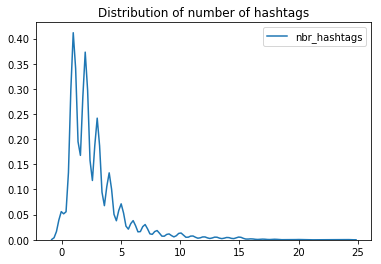

In [31]:
sns.kdeplot(tweet['nbr_hashtags']).set_title("Distribution of number of hashtags")

Most tweets have hashtags in the range of 1 -4 

In [32]:
tweet['length_tweet'].describe()

count    5254.000000
mean     125.756566 
std      68.328497  
min      0.000000   
25%      68.000000  
50%      118.000000 
75%      179.000000 
max      279.000000 
Name: length_tweet, dtype: float64

Text(0.5, 1.0, 'Distribution of length of tweets')

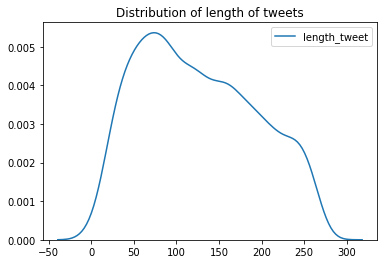

In [33]:
sns.kdeplot(tweet['length_tweet']).set_title("Distribution of length of tweets")

Length of tweet is widely distributed. But most tweets are in the length of 50-75

Text(0.5, 1.0, 'Distribution of number of retweets')

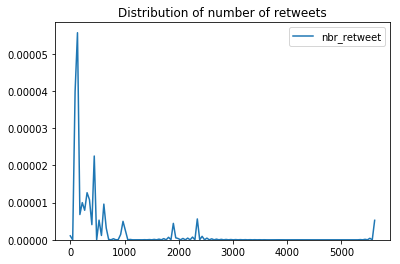

In [34]:
sns.kdeplot(tweet['nbr_retweet']).set_title("Distribution of number of retweets")

The number of tweets are highest for the range of 0-200 retweets

Text(0.5, 1.0, 'Distribution of number of likes')

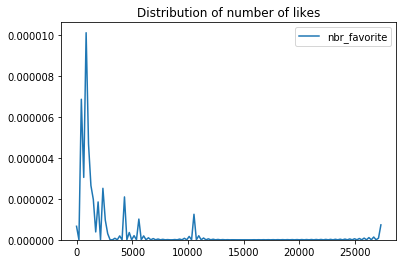

In [35]:
sns.kdeplot(tweet['nbr_favorite']).set_title("Distribution of number of likes")

Most of the tweets got about 200-400 likes. Very few tweets got above 5000 likes

In [36]:
tweet['datetime']=pd.to_datetime(tweet['datetime'],errors='coerce') # converting the column to datetime format

In [37]:
tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5254 entries, 0 to 5253
Data columns (total 10 columns):
datetime         5254 non-null datetime64[ns]
nbr_favorite     5254 non-null int64
nbr_reply        5254 non-null int64
nbr_retweet      5254 non-null int64
text             5254 non-null object
cleaned_tweet    5254 non-null object
hashtags         5254 non-null object
nbr_hashtags     5254 non-null int64
final_tweet      5254 non-null object
length_tweet     5254 non-null int64
dtypes: datetime64[ns](1), int64(5), object(4)
memory usage: 410.5+ KB


In [38]:
tweet['date']=tweet['datetime'].dt.day # extracting the date and storing in another column

In [39]:
tweet['hour_of_day']=tweet['datetime'].dt.hour # extracting the hour and storing in another column

In [40]:
tweet.sample(5)

,datetime,nbr_favorite,nbr_reply,nbr_retweet,text,cleaned_tweet,hashtags,nbr_hashtags,final_tweet,length_tweet,date,hour_of_day
1877,2019-11-29 23:47:12,2,5,0,strange how there's a terrorist attack when there's a general election campaign going on #LondonBridge #londonshooting,strange how there's a terrorist attack when there's a general election campaign going on,#LondonBridge #londonshooting,2,strange terrorist attack general election campaign go,91,29,23
4678,2019-11-30 15:46:50,4,0,1,"We live in challenging times and ask so much of our emergency services, and the general public. It’s so very difficult ... We must stay strong, and united in supporting all of our communities. #StrongerTogether #LondonBridge #LondonShooting #LondonBridgeAttack https:// twitter.com/terrorismpolic e/status/1200511722001510400 …","We live in challenging times and ask so much of our emergency services, and the general public. It’s so very difficult ... We must stay strong, and united in supporting all of our communities.",#StrongerTogether #LondonBridge #LondonShooting #LondonBridgeAttack,4,live challenge time ask emergency service general public difficult stay strong unite support community,201,30,15
243,2019-11-29 21:27:31,0,2,0,"Feds on roofs everywhere surrounding London Bridge and in the water too, I’m telling you, they know something we don’t. #LondonShooting #LondonBridge","Feds on roofs everywhere surrounding London Bridge and in the water too, I’m telling you, they know something we don’t.",#LondonShooting #LondonBridge,2,fed roof surround london bridge water tell know,122,29,21
3971,2019-11-30 07:25:41,2,2,1,Where did you get this? #LondonBridgeAttack #LondonShooting,Where did you get this?,#LondonBridgeAttack #LondonShooting,2,,26,30,7
4080,2019-11-30 08:54:38,1,0,1,Screenshot taken by someone in a different time zone. \n\n#LondonBridge \n#LondonShooting https:// twitter.com/dorset_eye/sta tus/1200478068596510721 …,Screenshot taken by someone in a different time zone.,#LondonBridge #LondonShooting,2,screenshot take different time zone,59,30,8


In [41]:
tweet['date'].value_counts() 

30    3045
29    1928
1     188 
2     88  
3     5   
Name: date, dtype: int64

Highest number of tweets was seen in 30/11/2019

Text(0.5, 1.0, 'Distribution of tweets/hour')

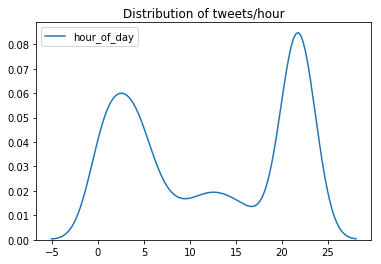

In [42]:
sns.kdeplot(tweet['hour_of_day']).set_title("Distribution of tweets/hour")

Most number of tweets are tweeted between 8-10pm. That is when most of the people are free and engage more in social media

In [43]:
tweet['hour_of_day'].value_counts() 

21    811
22    792
4     453
23    427
1     400
0     335
2     305
3     272
5     223
6     149
12    130
13    111
15    107
11    95 
7     87 
14    85 
8     82 
9     75 
16    74 
10    71 
20    52 
17    49 
18    36 
19    33 
Name: hour_of_day, dtype: int64

Highest number of tweets is seen at 21:00 or 9p.m.

Defining a function to extract hashtags other than #LondonShooting

In [44]:
def extract_other_hashtags(text):
    extract=re.sub('#LondonShooting','',text) # removes'#LondonShooting' from the text
    extract_cleaned=re.sub(' +', ' ', extract) # removes any extra white spaces
    return extract_cleaned

In [45]:
tweet['other_hashtags']=tweet['hashtags'].apply(lambda x:extract_other_hashtags(x))

In [46]:
tweet.sample(5)

,datetime,nbr_favorite,nbr_reply,nbr_retweet,text,cleaned_tweet,hashtags,nbr_hashtags,final_tweet,length_tweet,date,hour_of_day,other_hashtags
5159,2019-12-01 23:49:09,9,1,7,Colonel Kemp published an article in the Sun giving his recommendations concerning what Britain needs to do prevent terror attacks. #mustread #UK #terrorism #London #londonterrorattack #londonshooting pic.twitter.com/fXvkRumPV4,Colonel Kemp published an article in the Sun giving his recommendations concerning what Britain needs to do prevent terror attacks.,#mustread #UK #terrorism #London #londonterrorattack #londonshooting,6,colonel kemp publish article sun give recommendation concern britain need prevent terror attack,145,1,23,#mustread #UK #terrorism #London #londonterrorattack #londonshooting
4960,2019-11-30 23:35:01,0,0,0,People behind such stories have pristine soul and full of childlike innocence. They are not aware that eventually these terrorists would come for them too...\n\n#LondonShooting #LondonBridge #LondonAttack https:// twitter.com/DailyMirror/st atus/1200816533758451717 …,People behind such stories have pristine soul and full of childlike innocence. They are not aware that eventually these terrorists would come for them too...,#LondonShooting #LondonBridge #LondonAttack,3,people story pristine soul childlike innocence aware eventually terrorist come,162,30,23,#LondonBridge #LondonAttack
2498,2019-11-30 01:41:39,1,2,0,"Civilian Londoners had this guy on the floor. Police needn't shoot him, they piled on him, knew the vest was a fake. #LondonShooting","Civilian Londoners had this guy on the floor. Police needn't shoot him, they piled on him, knew the vest was a fake.",#LondonShooting,1,civilian londoners guy floor police need shoot pile know vest fake,117,30,1,
2009,2019-11-30 00:21:03,1,0,1,London Bridge knife terror attack: Two members of the public dead - latest news #LondonShooting #LondonBridge https://www. telegraph.co.uk/news/2019/11/2 9/london-bridge-reports-gunshots-central-london/#update-20191129-1828 …,London Bridge knife terror attack: Two members of the public dead - latest news,#LondonShooting #LondonBridge,2,london bridge knife terror attack member public dead late news,83,30,0,#LondonBridge
1857,2019-11-29 23:41:23,2,1,1,# LondonShooting \nFrom 2017: Tory suspension of election campaign: https:// ducksoap.wordpress.com/2017/05/24/ele ction-2017-suspension-of-election-campaigns-after-terror-attack/ …,From 2017: Tory suspension of election campaign:,# LondonShooting,1,tory suspension election campaign,51,29,23,# LondonShooting


### Unigrams

In [47]:
all_tweets=tweet['final_tweet'].tolist() # combining all the cleaned and lemmatised tweets and converting to a list

Defining a function which return top n number of words based on their number of occurrences

In [48]:
def getMostCommon(reviews_list,topn):
    reviews=" ".join(reviews_list)
    tokenised_reviews=reviews.split(" ") # splitting the text using " " character
    
    
    freq_counter=Counter(tokenised_reviews) # gives count of each word in the text
    return freq_counter.most_common(topn) # return words with the highest frequencies

Defining a function which uses the above function to generate a bar plot which will show the words with highest frequencies

In [49]:
def plotMostCommonWords(reviews_list,topn,title="Most Frequent Words",color="blue",axis=None): #default colour is given as blue
    top_words=getMostCommon(reviews_list,topn=topn)
    data=pd.DataFrame()
    data['words']=[val[0] for val in top_words]
    data['freq']=[val[1] for val in top_words]
    if axis!=None:
        sns.barplot(y='words',x='freq',data=data,color=color,ax=axis).set_title(title+" top "+str(topn))
    else:
        sns.barplot(y='words',x='freq',data=data,color=color).set_title(title+" top "+str(topn))

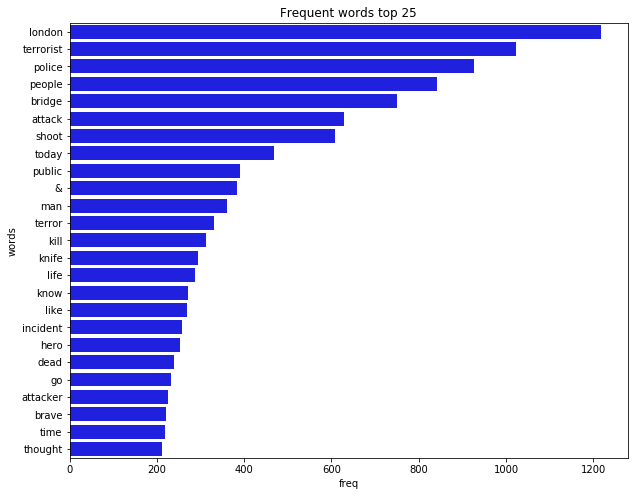

In [50]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 10,8 ## Sets the heigth and width of image

plotMostCommonWords(all_tweets,25,"Frequent words") # plotting the top 25 frequently occuring words in the tweets 

Here we can see that london, terrorist, bridge, attack, etc. are the most frequently occuring words

This does not give much understanding. Hence we should use bigrams or trigrams.

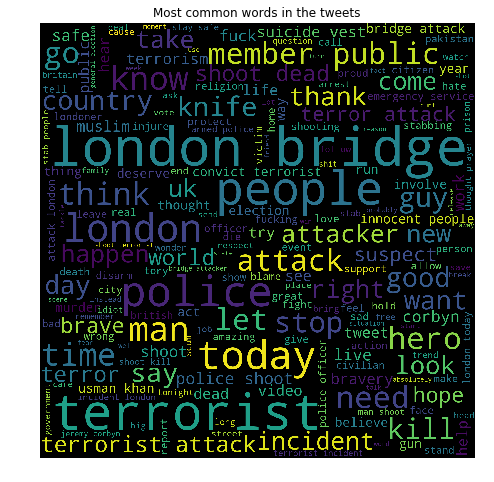

In [51]:
from wordcloud import WordCloud
wordcloud = WordCloud(height=2000, width=2000, background_color='black')
wordcloud = wordcloud.generate(' '.join(tweet['final_tweet'].tolist()))
plt.imshow(wordcloud)
plt.title("Most common words in the tweets")
plt.axis('off')
plt.show()

### Bigrams

Defining a function to create n-grams. The text and number required are given as arguments

In [52]:
def generateNGram(text,n):
    tokens=text.split(" ")
    ngrams = zip(*[tokens[i:] for i in range(n)])
    return ["_".join(ngram) for ngram in ngrams]

In [53]:
tweet_bigrams=[" ".join(generateNGram(review,2)) for review in all_tweets] # creating bigrams and storing it in a list

In [54]:
tweet_bigrams[:5]

['london_bridge bridge_seal seal_report report_gunfire gunfire_londonbridge',
 '',
 'unconfirmed_report report_shooting shooting_london london_bridge.emery bridge.emery_take take_sack sack_pretty pretty_badly',
 'video_eyewitness eyewitness_shooting',
 'friendly_reminder reminder_london london_bridge bridge_tower tower_bridge']

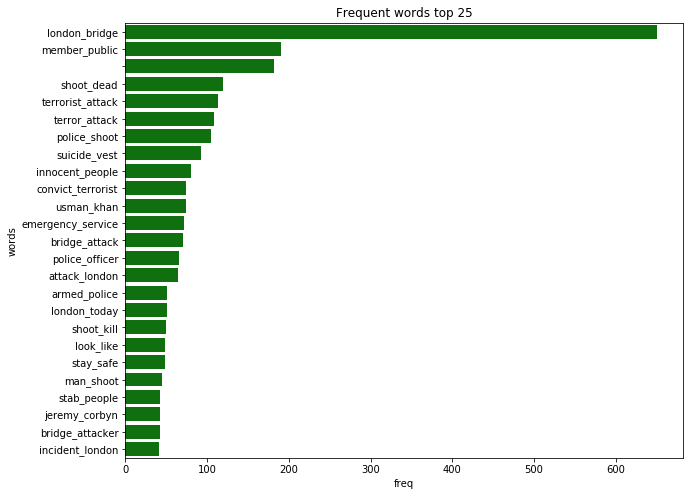

In [55]:
rcParams['figure.figsize'] = 10,8 ## Sets the heigth and width of image

plotMostCommonWords(tweet_bigrams,25,"Frequent words",color="green") # plotting the most frequently occurring bigrams

london_bridge, member_public, shoot_dead, terrorist_attack, terror_attack are the most frequently occuring bigrams

### Trigrams

In [56]:
tweet_trigrams=[" ".join(generateNGram(review,3)) for review in all_tweets] # creating trigrams and storing in a list

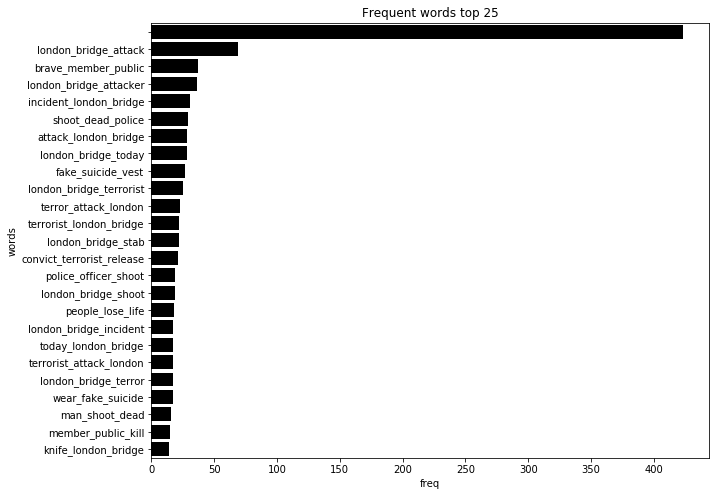

In [57]:
rcParams['figure.figsize'] = 10,8 ## Sets the heigth and width of image

plotMostCommonWords(tweet_trigrams,25,"Frequent words",color="black") # plotting the most frequently occurring trigrams

london_bridge_attack, brave_member_public, london_bridge_attacker are the most frequently occurring trigrams

### Sentiment analysis

In [58]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

Defining a function which returns the compound score of the sentiment. Using this score, we can calculate the tweet as positive, negative or neutral.

In [59]:
def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    return score['compound']

In [60]:
tweet['sentiment_score']=tweet['cleaned_tweet'].apply(lambda x:sentiment_analyzer_scores(x))

In [61]:
tweet.sample(5)

,datetime,nbr_favorite,nbr_reply,nbr_retweet,text,cleaned_tweet,hashtags,nbr_hashtags,final_tweet,length_tweet,date,hour_of_day,other_hashtags,sentiment_score
987,2019-11-29 22:16:59,2498,41,328,"Londoners confirm to be among the bravest people ever. Proud to be a tiny part of this city, which turns into a huge family, when in need. \n#LondonBridge #LondonShooting #London","Londoners confirm to be among the bravest people ever. Proud to be a tiny part of this city, which turns into a huge family, when in need.",#LondonBridge #LondonShooting #London,3,londoner confirm brave people proud tiny city turn huge family need,144,29,22,#LondonBridge #London,0.8271
3064,2019-11-30 03:42:16,47,9,37,"The attacker was known to police and had links to ISLAMIST TERROR GROUPS. \n\nWhilst it might not be all Muslims, this attack was because of Islam and because of Islamic Scripture.\n\n7th Century Scripture!!!\n\n#LondonShooting \n#London \n#LondonBridgeshooting \n#LondonBridge pic.twitter.com/vQaHVCs98x","The attacker was known to police and had links to ISLAMIST TERROR GROUPS. Whilst it might not be all Muslims, this attack was because of Islam and because of Islamic Scripture.7th Century Scripture!!!",#LondonShooting #London #LondonBridgeshooting #LondonBridge,4,attacker know police link islamist terror group whilst muslims attack islam islamic scripture.7th century scripture,204,30,3,#London #LondonBridgeshooting #LondonBridge,-0.9236
1885,2019-11-29 23:50:35,21,3,11,"A man has been shot dead by police in an attack at London Bridge.\n\nThe suspect, who died at the scene, was believed to have been wearing a hoax explosive device, police said.\n\n#LondonBridgeshooting #LondonShooting \n\n pic.twitter.com/JhXuB4T4vN","A man has been shot dead by police in an attack at London Bridge.The suspect, who died at the scene, was believed to have been wearing a hoax explosive device, police said.",#LondonBridgeshooting #LondonShooting,2,man shoot dead police attack london bridge.the suspect die scene believe wear hoax explosive device police say,176,29,23,#LondonBridgeshooting,-0.9360
2466,2019-11-30 01:37:12,0,0,0,London Bridge is not falling down.\n\nIdiots are getting double tapped. #LondonBridge #LondonShooting #London #LondonBridgeAttack,London Bridge is not falling down.Idiots are getting double tapped.,#LondonBridge #LondonShooting #London #LondonBridgeAttack,4,london bridge fall down.idiot get double tap,74,30,1,#LondonBridge #London #LondonBridgeAttack,0.1139
4196,2019-11-30 10:38:09,0,0,0,"# londonterrorattack \nThese MF Mohammed's are ruining Global peace. Terror, rape, drugs, crime you name it they are behind it.\n#Nirbhaya \n #LondonBridge #LondonShooting #HangRapists","These MF Mohammed's are ruining Global peace. Terror, rape, drugs, crime you name it they are behind it.",# londonterrorattack #Nirbhaya #LondonBridge #LondonShooting #HangRapists,5,mf mohammed ruin global peace terror rape drug crime,111,30,10,# londonterrorattack #Nirbhaya #LondonBridge #HangRapists,-0.8779


Defining a function which returns the sentiment category of the tweet based on the below criterias

In [62]:
def sentiment_category(score):
    if score >= 0.05:
        return "Positive"
    elif score <= -0.05:
        return "Negative"
    else:
        return "Neutral"

In [63]:
tweet['sentiment']=tweet['sentiment_score'].apply(lambda x:sentiment_category(x))

In [64]:
tweet.sample(5)

,datetime,nbr_favorite,nbr_reply,nbr_retweet,text,cleaned_tweet,hashtags,nbr_hashtags,final_tweet,length_tweet,date,hour_of_day,other_hashtags,sentiment_score,sentiment
3581,2019-11-30 04:59:48,0,2,0,It is not democratic at all that the police should shoot a subdued person #LondonShooting,It is not democratic at all that the police should shoot a subdued person,#LondonShooting,1,democratic police shoot subdue person,74,30,4,,-0.3400,Negative
117,2019-11-29 21:18:36,0,0,0,Well done to the brave civilians and police who managed to tackle the guy down and for the police officer who shot this scum bag\n https:// order-order.com/2019/11/29/wat ch-alleged-terrorist-wrestled-shot-london-bridge/ … \n\n#LondonShooting #londonbridge #London,Well done to the brave civilians and police who managed to tackle the guy down and for the police officer who shot this scum bag,,0,brave civilian police manage tackle guy police officer shoot scum bag,129,29,21,,0.6705,Positive
4959,2019-11-30 23:34:48,0,0,0,We need think deep down and find out why these nutters are behaving like this but as usual anyone who takes this line is brand a terrorist sypathiser. \n\n#LondonBridgeAttack \n#LondonShooting \n#London \n#londonterrorattack,We need think deep down and find out why these nutters are behaving like this but as usual anyone who takes this line is brand a terrorist sypathiser.,#LondonBridgeAttack #LondonShooting #London #londonterrorattack,4,need think deep find nutter behave like usual take line brand terrorist sypathiser,157,30,23,#LondonBridgeAttack #London #londonterrorattack,-0.7783,Negative
1575,2019-11-29 23:01:50,5,0,0,Thoughts are with all involved in the #LondonShooting hats off to the MOP that challenged the individual and also thought with the @MPSFirearms officer that had to pull the trigger and deal with the aftermath. @LAS_JRU @Ldn_Ambulance hope all staff are ok as well #team999,Thoughts are with all involved in the hats off to the MOP that challenged the individual and also thought with the officer that had to pull the trigger and deal with the aftermath. hope all staff are ok as well,#LondonShooting #team999,2,thought involve hat mop challenge individual think officer pull trigger deal aftermath hope staff ok,219,29,23,#team999,0.7003,Positive
2955,2019-11-30 03:12:25,1,2,0,"Let me guess, a extinction rebellion supporter #LondonShooting #AboutTime #policedidgood","Let me guess, a extinction rebellion supporter",#LondonShooting #AboutTime #policedidgood,3,let guess extinction rebellion supporter,51,30,3,#AboutTime #policedidgood,0.1531,Positive


In [65]:
tweet['sentiment'].value_counts() 

Negative    2872
Positive    1586
Neutral     796 
Name: sentiment, dtype: int64

The most number of tweets have negative sentiments

#### Plotting the distribution of number of tweets over the hours, separately for positive, negative and neutral tweets

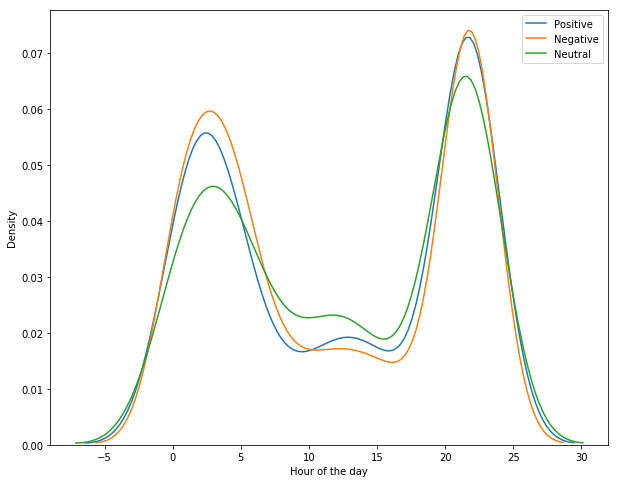

In [66]:
sns.kdeplot(tweet.loc[tweet['sentiment']=="Positive","hour_of_day"],label='Positive');
sns.kdeplot(tweet.loc[tweet['sentiment']=="Negative","hour_of_day"],label='Negative');
sns.kdeplot(tweet.loc[tweet['sentiment']=="Neutral","hour_of_day"],label='Neutral');

# beautifying the labels
plt.xlabel('Hour of the day')
plt.ylabel('Density')
plt.show()

Plotting the distribution of tweets category

Text(0.5, 1.0, 'Distribution of Tweets Category')

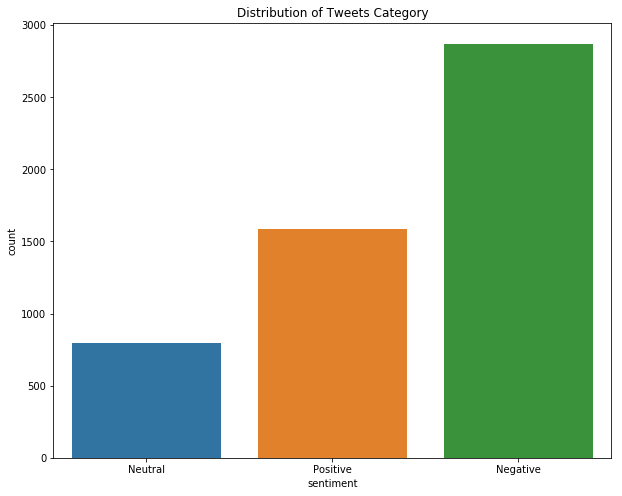

In [67]:
sns.countplot(tweet['sentiment']).set_title("Distribution of Tweets Category")

In [68]:
positive_tweets=tweet.loc[tweet['sentiment']=='Positive','final_tweet'].tolist() # extracting only the positive tweets and putting in a list

In [69]:
negative_tweets=tweet.loc[tweet['sentiment']=='Negative','final_tweet'].tolist() # extracting only the negative tweets and putting in a list

Creating bigrams for both positive and negative tweets

In [70]:
positive_tweets_bigrams=[" ".join(generateNGram(review,2)) for review in positive_tweets]
negative_tweets_bigrams=[" ".join(generateNGram(review,2)) for review in negative_tweets]

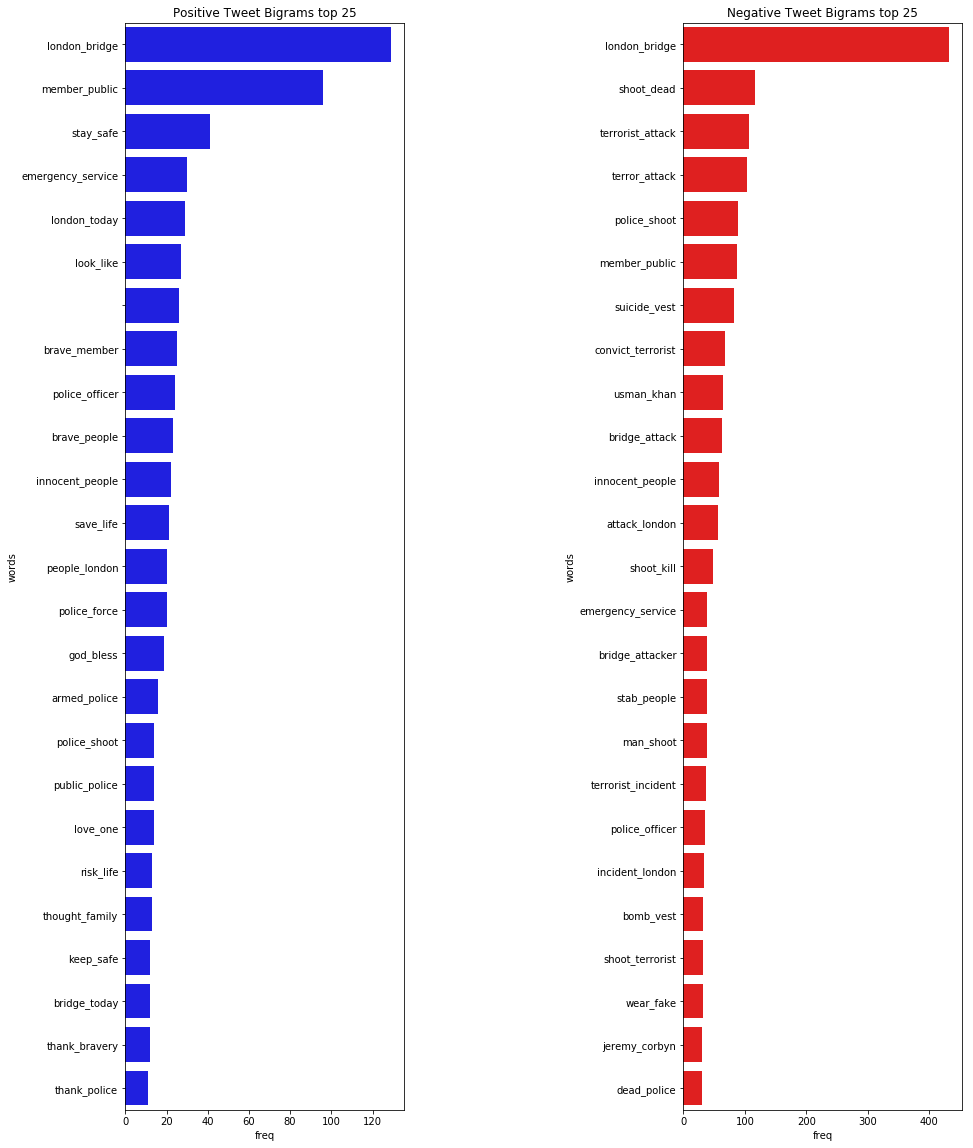

In [71]:
rcParams['figure.figsize'] = 15,20
fig,ax=plt.subplots(1,2)
fig.subplots_adjust(wspace=1) #Adjusts the space between the two plots
plotMostCommonWords(positive_tweets_bigrams,25,"Positive Tweet Bigrams",axis=ax[0])
# plotting both most frequently positive and negative bigrams
plotMostCommonWords(negative_tweets_bigrams,25,"Negative Tweet Bigrams",color="red",axis=ax[1])

Creating trigrams for both positive and negative tweets

In [72]:
positive_tweets_trigrams=[" ".join(generateNGram(review,3)) for review in positive_tweets]
negative_tweets_trigrams=[" ".join(generateNGram(review,3)) for review in negative_tweets]

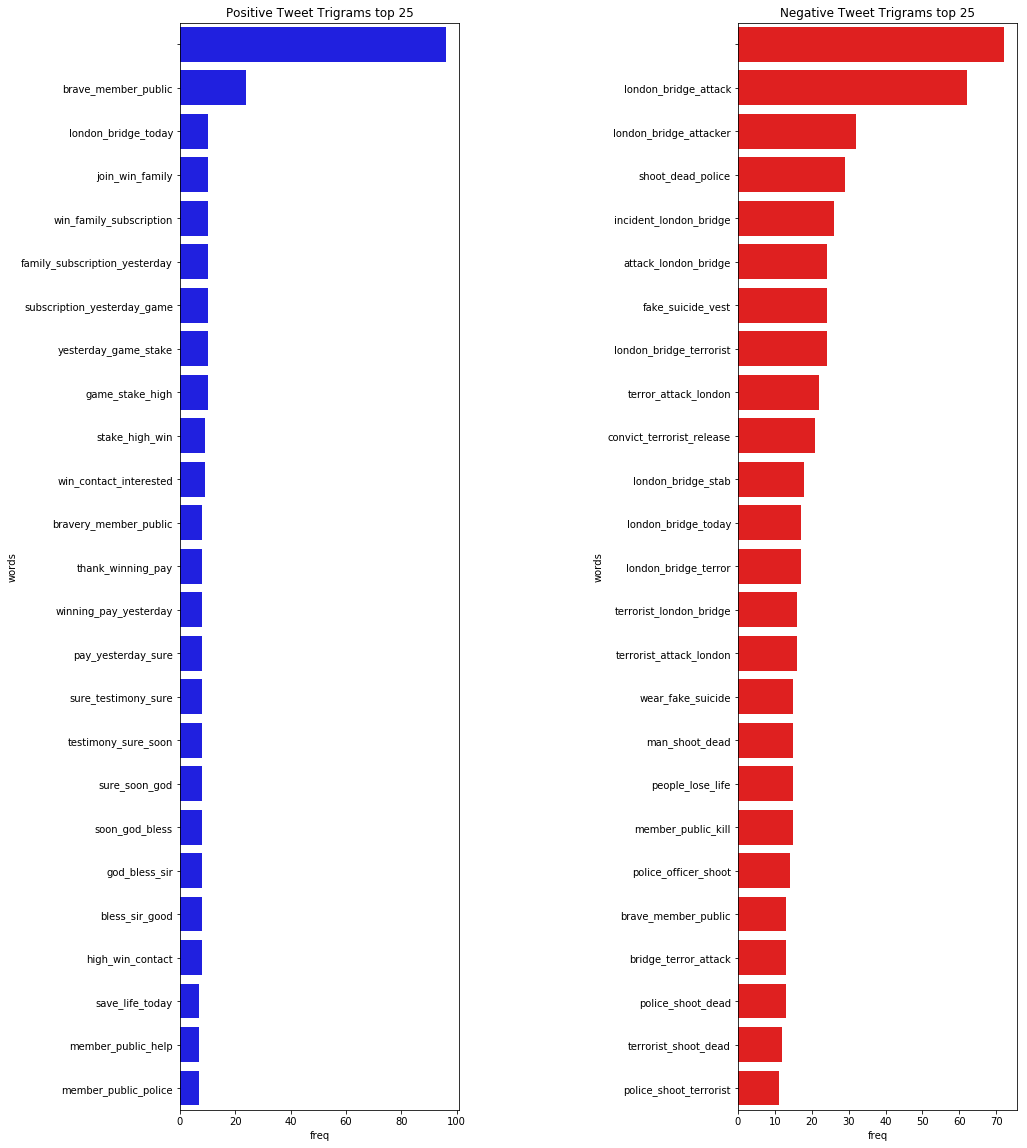

In [73]:
rcParams['figure.figsize'] = 15,20
fig,ax=plt.subplots(1,2)
fig.subplots_adjust(wspace=1) #Adjusts the space between the two plots
plotMostCommonWords(positive_tweets_trigrams,25,"Positive Tweet Trigrams",axis=ax[0])
# plotting both most frequently positive and negative trigrams
plotMostCommonWords(negative_tweets_trigrams,25,"Negative Tweet Trigrams",color="red",axis=ax[1])

### Topic Modelling

Defining a function to extract all the adjectives and nouns from the tweets

In [74]:
def extract_adj_nouns(text):
    document=nlp(text)
    adj_nouns=[token for token in document if (token.text not in stopwords) and token.pos_ in ["ADJ","NOUN"]] # extract only adjectives and nouns
    extracted = ' '.join([str(elem) for elem in adj_nouns]) # joining the words back to form a string
    return extracted

In [75]:
tweet['noun_adj_tweet']=tweet['cleaned_tweet'].apply(lambda x:extract_adj_nouns(x))

In [76]:
tweet.sample(5)

,datetime,nbr_favorite,nbr_reply,nbr_retweet,text,cleaned_tweet,hashtags,nbr_hashtags,final_tweet,length_tweet,date,hour_of_day,other_hashtags,sentiment_score,sentiment,noun_adj_tweet
2032,2019-11-30 00:27:07,2,0,0,"Some real heroes in our capital today, both in and out of the police force. Truly inspiring. #LondonShooting","Some real heroes in our capital today, both in and out of the police force. Truly inspiring.",#LondonShooting,1,real hero capital today police force truly inspiring,93,30,0,,0.8402,Positive,real heroes capital today police force inspiring
3042,2019-11-30 03:36:54,0,0,0,This guy for prime minister please #LondonBridge #LondonShooting #LondonBridgeAttack https:// twitter.com/colinmichaei/s tatus/1200424783395139584 …,This guy for prime minister please,#LondonBridge #LondonShooting #LondonBridgeAttack,3,guy prime minister,40,30,3,#LondonBridge #LondonBridgeAttack,0.3182,Positive,guy
631,2019-11-29 21:52:34,1,3,0,"Was on #LondonBridge Northern Line platform when many phones pinged with BBC notification of gunshots being heard. Seconds later a tube announcement was made of major incident and trains stopping. Scariest thing I've been through, not knowing where #LondonShooting was exactly.","Was on Northern Line platform when many phones pinged with BBC notification of gunshots being heard. Seconds later a tube announcement was made of major incident and trains stopping. Scariest thing I've been through, not knowing where was exactly.",#LondonBridge #LondonShooting,2,northern line platform phone ping bbc notification gunshot hear second later tube announcement major incident train stop scary thing know exactly,251,29,21,#LondonBridge,-0.1531,Negative,platform phones notification gunshots Seconds tube announcement major incident trains Scariest thing
2574,2019-11-30 01:54:00,2,0,0,Perhaps next time a suicide bomber decides to attack. Maybe cuddle him and express Loving thoughts. That should do the job....\n#LondonShooting #LondonBridgeAttack #welldonemetpolice #Heroes #MetPolice,Perhaps next time a suicide bomber decides to attack. Maybe cuddle him and express Loving thoughts. That should do the job....,#LondonShooting #LondonBridgeAttack #welldonemetpolice #Heroes #MetPolice,5,time suicide bomber decide attack maybe cuddle express love thought job,134,30,1,#LondonBridgeAttack #welldonemetpolice #Heroes #MetPolice,-0.5719,Negative,time suicide bomber thoughts job
391,2019-11-29 21:37:59,1,1,1,Good news for Boris. Terror in London is a great way to increase the Conservative vote. Fear is the biggest motivator. #LondonShooting #GE2019,Good news for Boris. Terror in London is a great way to increase the Conservative vote. Fear is the biggest motivator.,#LondonShooting #GE2019,2,good news boris terror london great way increase conservative vote fear big motivator,121,29,21,#GE2019,0.4019,Positive,Good news Terror great way Conservative vote Fear biggest motivator


In [77]:
import gensim
from gensim import corpora

In [78]:
corpus=tweet['noun_adj_tweet'].tolist()

In [79]:
corpus[:6]

['reports gunfire londonbridge',
 'careful',
 'Unconfirmed reports shooting',
 'Video eyewitness',
 'friendly reminder',
 'news outlets people area']

#### To create term dictionary, we must have the string tokenised

In [80]:
tokenised_corpus=[]
for corp in corpus:
    tokenised_corpus.append([token for token in corp.split(" ")])
tokenised_corpus[:7]

[['reports', 'gunfire', 'londonbridge'],
 ['careful'],
 ['Unconfirmed', 'reports', 'shooting'],
 ['Video', 'eyewitness'],
 ['friendly', 'reminder'],
 ['news', 'outlets', 'people', 'area'],
 ['incident', 'reports', 'live', 'news']]

In [81]:
dictionary = corpora.Dictionary(tokenised_corpus)

In [82]:
len(dictionary)

5386

In [83]:
doc_term_matrix = [dictionary.doc2bow(rev) for rev in tokenised_corpus] # words with number oftimes they occur in the document

#### Creating the object for LDA model using gensim library

In [84]:
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=4, random_state=100,
                chunksize=750, passes=50) # number of topics is kept as 4

In [85]:
lda_model.print_topics() # printing the topics and the keywords under the topics

[(0,
  '0.071*"police" + 0.061*"knife" + 0.054*"attack" + 0.054*"British" + 0.036*"incident" + 0.034*"man" + 0.034*"attacker" + 0.031*"terrorist" + 0.027*"heart" + 0.025*"capital"'),
 (1,
  '0.038*"people" + 0.029*"today" + 0.025*"public" + 0.025*"" + 0.024*"terrorist" + 0.023*"police" + 0.012*"brave" + 0.011*"vest" + 0.011*"lives" + 0.011*"innocent"'),
 (2,
  '0.044*"terrorists" + 0.031*"system" + 0.031*"risk" + 0.031*"hate" + 0.029*"street" + 0.028*"sympathies" + 0.028*"intention" + 0.028*"division" + 0.028*"son" + 0.028*"Sorry"'),
 (3,
  '0.053*"people" + 0.033*"poor" + 0.032*"choice" + 0.032*"sense" + 0.032*"training" + 0.032*"common" + 0.031*"tips" + 0.031*"online" + 0.031*"yo" + 0.031*"cust"')]

In [86]:
import pyLDAvis
import pyLDAvis.gensim

In [87]:
# Visualizing the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, doc_term_matrix, dictionary)
vis

C:\Users\Pom\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.101735  0.106801  1       1        40.908695
0     -0.259167 -0.121495  2       1        24.100294
2      0.233490 -0.212052  3       1        18.013985
3      0.127412  0.226745  4       1        16.977028, topic_info=     Category        Freq        Term       Total  loglift  logprob
29    Default  435.000000  knife       435.000000  30.0000  30.0000
32    Default  792.000000  police      792.000000  29.0000  29.0000
226   Default  388.000000  attack      388.000000  28.0000  28.0000
327   Default  386.000000  British     386.000000  27.0000  27.0000
13    Default  732.000000  people      732.000000  26.0000  26.0000
550   Default  233.000000  terrorists  233.000000  25.0000  25.0000
14    Default  259.000000  incident    259.000000  24.0000  24.0000
45    Default  355.000000  today       355.000000  23.0000  23.0000
139   Default  273.000000  attacker    273.000000  22.0000  22.0000
1084  Default  166.000000  poor        166.000000  21.0000  21.0000
1587  Default  163.000000  choice      163.000000  20.0000  20.0000
1327  Default  163.000000  sense       163.000000  19.0000  19.0000
30    Default  335.000000  man         335.000000  18.0000  18.0000
713   Default  167.000000  system      167.000000  17.0000  17.0000
3019  Default  161.000000  training    161.000000  16.0000  16.0000
349   Default  160.000000  common      160.000000  15.0000  15.0000
269   Default  166.000000  risk        166.000000  14.0000  14.0000
418   Default  164.000000  hate        164.000000  13.0000  13.0000
3505  Default  155.000000  tips        155.000000  12.0000  12.0000
2890  Default  155.000000  online      155.000000  11.0000  11.0000
5383  Default  154.000000  yo          154.000000  10.0000  10.0000
5382  Default  154.000000  star        154.000000  9.0000   9.0000 
5381  Default  154.000000  music       154.000000  8.0000   8.0000 
5380  Default  154.000000  cust        154.000000  7.0000   7.0000 
313   Default  191.000000  heart       191.000000  6.0000   6.0000 
805   Default  156.000000  street      156.000000  5.0000   5.0000 
66    Default  301.000000  public      301.000000  4.0000   4.0000 
18    Default  298.000000              298.000000  3.0000   3.0000 
3232  Default  151.000000  sympathies  151.000000  2.0000   2.0000 
1264  Default  151.000000  intention   151.000000  1.0000   1.0000 
...       ...         ...        ...          ...     ...      ... 
5381  Topic4   154.135056  music       154.712906  1.7696  -3.4878 
5382  Topic4   154.135056  star        154.712906  1.7696  -3.4878 
5383  Topic4   154.135056  yo          154.712906  1.7696  -3.4878 
193   Topic4   36.526405   prayers     37.132919   1.7568  -4.9276 
491   Topic4   27.457396   political   28.053860   1.7518  -5.2130 
124   Topic4   25.307795   year        25.911369   1.7497  -5.2945 
216   Topic4   18.269827   tonight     18.888226   1.7400  -5.6204 
1373  Topic4   17.100601   rights      17.702265   1.7387  -5.6865 
2194  Topic4   15.358262   justice     15.979995   1.7336  -5.7940 
1726  Topic4   15.244709   jail        15.862114   1.7336  -5.8014 
643   Topic4   14.541501   tragedy     15.158853   1.7317  -5.8486 
797   Topic4   13.952762   fuck        14.574059   1.7297  -5.8899 
1961  Topic4   12.510866   laws        13.107367   1.7267  -5.9990 
972   Topic4   12.202014   problem     12.796371   1.7257  -6.0240 
1474  Topic4   11.677433   violence    12.280412   1.7230  -6.0680 
1525  Topic4   11.448396   Muslim      12.043550   1.7226  -6.0878 
203   Topic4   11.249068   moment      11.857185   1.7207  -6.1053 
348   Topic4   10.852428   second      11.459920   1.7188  -6.1412 
1131  Topic4   10.788270   question    11.403603   1.7178  -6.1472 
887   Topic4   10.475515   chance      11.074628   1.7177  -6.1766 
1094  Topic4   10.553939   Terrorism   11.159726   1.7175  -6.1691 
2008  Topic4   10.261136   cr

Defining a function to show the most dominant topic in each text

In [88]:
def format_topics_sentences(ldamodel, corpus, texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=doc_term_matrix, texts=corpus)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,1.0,0.5511,"people, today, public, , terrorist, police, brave, vest, lives, innocent",reports gunfire londonbridge
1,1,0.0,0.6247,"police, knife, attack, British, incident, man, attacker, terrorist, heart, capital",careful
2,2,1.0,0.5591,"people, today, public, , terrorist, police, brave, vest, lives, innocent",Unconfirmed reports shooting
3,3,0.0,0.7466,"police, knife, attack, British, incident, man, attacker, terrorist, heart, capital",Video eyewitness
4,4,2.0,0.7498,"terrorists, system, risk, hate, street, sympathies, intention, division, son, Sorry",friendly reminder
5,5,1.0,0.6348,"people, today, public, , terrorist, police, brave, vest, lives, innocent",news outlets people area
6,6,3.0,0.6167,"people, poor, choice, sense, training, common, tips, online, yo, cust",incident reports live news
7,7,3.0,0.4181,"people, poor, choice, sense, training, common, tips, online, yo, cust",More shooter
8,8,1.0,0.6250,"people, today, public, , terrorist, police, brave, vest, lives, innocent",
9,9,0.0,0.5164,"police, knife, attack, British, incident, man, attacker, terrorist, heart, capital",news video market


In [89]:
lda_model.log_perplexity(doc_term_matrix) 

-7.784976428996798

Lower the perplexity, better the model